In [2]:
import pandas as pd
from datetime import datetime, timedelta
import cwms
from dotenv import load_dotenv
import os


In [3]:
# grab API variables from .env file
load_dotenv()
APIROOT = os.getenv("API_ROOT")
OFFICE = os.getenv("OFFICE")
APIKEY = os.getenv('API_KEY')
# connect to T7
apiKey = "apikey " + APIKEY
api = cwms.api.init_session(api_root=APIROOT, api_key=apiKey)

cwms_missing_value = -340282346638528859811704183484516925440
cwms_missing_quality = 5

In [36]:
# grab ts with spike
ts_id = 'Homme_Dam.Stage.Inst.15Minutes.0.rev'
start = datetime(2019, 12, 31)
# end = datetime.now()
end = datetime(2020, 1, 2)
ts = cwms.get_timeseries(ts_id=ts_id, office_id=OFFICE,begin=start, end = end)

<Axes: xlabel='date-time'>

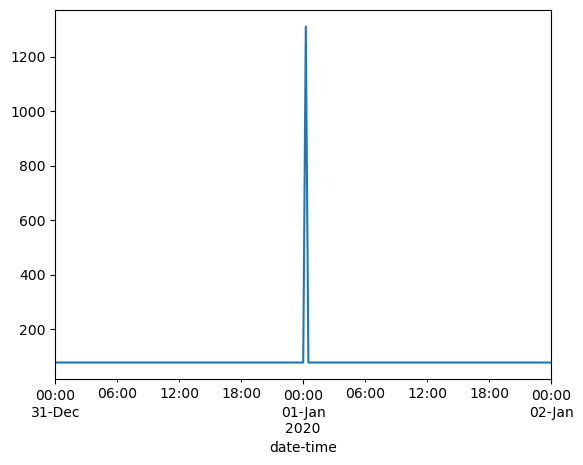

In [37]:
# set index to date-time for plotting
df = ts.df.copy().set_index('date-time')
# df = ts.df.copy()
# plot it
df.value.plot()

In [38]:
# screen values
maxVal = 90
minVal = 70

# set values out of range to missing value
df.loc[df['value'] > maxVal, 'value'] = cwms_missing_value
df.loc[df['value'] < minVal, 'value'] = cwms_missing_value
# set quality-code for missing values to missing code
df.loc[df['value'] == cwms_missing_value, 'quality-code'] = cwms_missing_quality
df.describe()

,value,quality-code
count,1.930000e+02,193.000000
mean,-1.763121e+36,0.025907
std,2.449406e+37,0.359908
min,-3.402823e+38,0.000000
25%,7.693000e+01,0.000000
50%,7.693000e+01,0.000000
75%,7.694000e+01,0.000000
max,7.694000e+01,5.000000


In [39]:
# select only missing values to save back to database

dfToDelete = df[df['value']== cwms_missing_value]
# reset the index back to integer
dfToDelete = dfToDelete.reset_index()
dfToDelete

,date-time,value,quality-code
0,2020-01-01 00:15:00+00:00,-3.402823e+38,5


In [40]:
data = cwms.timeseries_df_to_json(office_id=OFFICE, ts_id=ts.json['name'], data = dfToDelete, units=ts.json['units'])
data

{'name': 'Homme_Dam.Stage.Inst.15Minutes.0.rev',
 'office-id': 'MVP',
 'units': 'ft',
 'values': [['2020-01-01T00:15:00+00:00', -3.4028234663852886e+38, 5]],
 'version-date': None}

In [41]:
# save to database
cwms.store_timeseries(data = data)

<Axes: xlabel='date-time'>

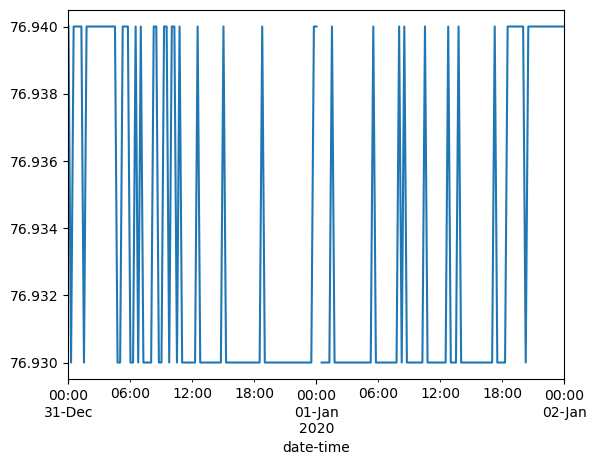

In [42]:
# confirm written with missing

ts = cwms.get_timeseries(ts_id=ts_id, office_id=OFFICE,begin=start, end = end)
df = ts.df.copy().set_index('date-time')
df.value.plot()

In [43]:
df.describe()


,value,quality-code
count,192.000000,193.000000
mean,76.933333,0.025907
std,0.004726,0.359908
min,76.930000,0.000000
25%,76.930000,0.000000
50%,76.930000,0.000000
75%,76.940000,0.000000
max,76.940000,5.000000
